In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [75]:

df_1 = pd.read_csv("/Users/branly/Desktop/Python Project/FP.csv")


df_1['OrderDate'] = pd.to_datetime(df_1['OrderDate'])


start_date = '2015-01-01'
end_date = '2017-09-30'  

df_filtered = df_1[(df_1['OrderDate'] >= start_date) & (df_1['OrderDate'] <= end_date)]


aggregate = {
    'Sales': 'last',
    'Order_Id': 'last',
    'Customer_Segment': 'last',
    'OrderDate': 'last',
    'Category_Name':'last',
    'Market':'last'
}

df = df_filtered.groupby('column1').agg(aggregate).reset_index()



In [78]:

df_home_office = df[df['Customer_Segment'] == 'Home Office'].copy()
df_consumer = df[df['Customer_Segment'] == 'Consumer'].copy()
df_corporate = df[df['Customer_Segment'] == 'Corporate'].copy()

In [79]:
df_home_office.head()

,column1,Sales,Order_Id,Customer_Segment,OrderDate,Category_Name,Market
0,48,119.980003,28744,Home Office,2016-02-24 13:57:00,Fishing,Pacific Asia
1,49,79.980003,45461,Home Office,2016-10-25 14:39:00,Women's Apparel,Pacific Asia
2,50,100.000000,31115,Home Office,2016-03-30 04:37:00,Women's Apparel,Pacific Asia
3,51,79.980003,45766,Home Office,2016-10-30 01:31:00,Camping & Hiking,Pacific Asia
4,52,100.000000,47752,Home Office,2016-11-28 01:18:00,Women's Apparel,Pacific Asia


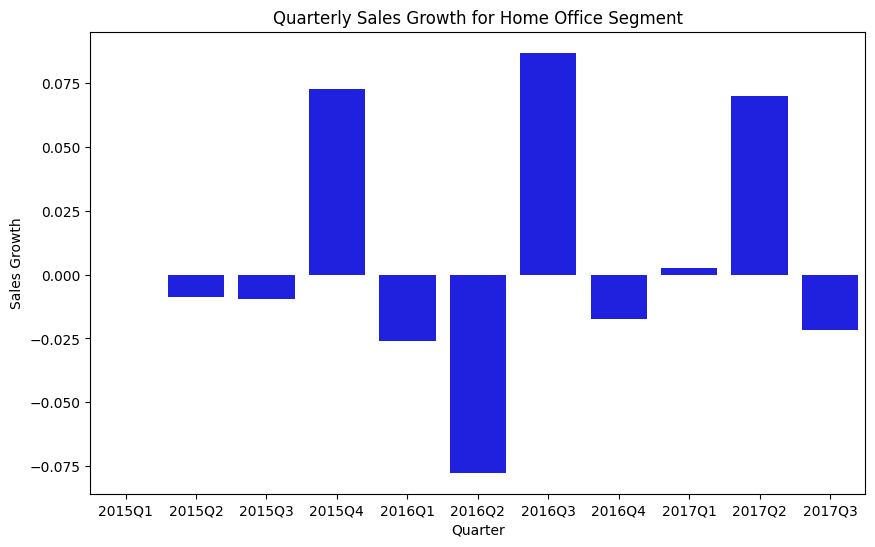

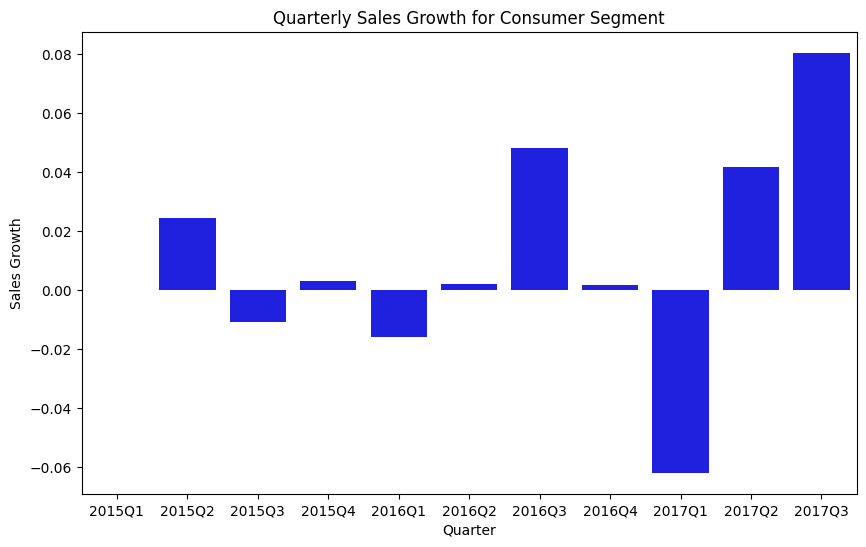

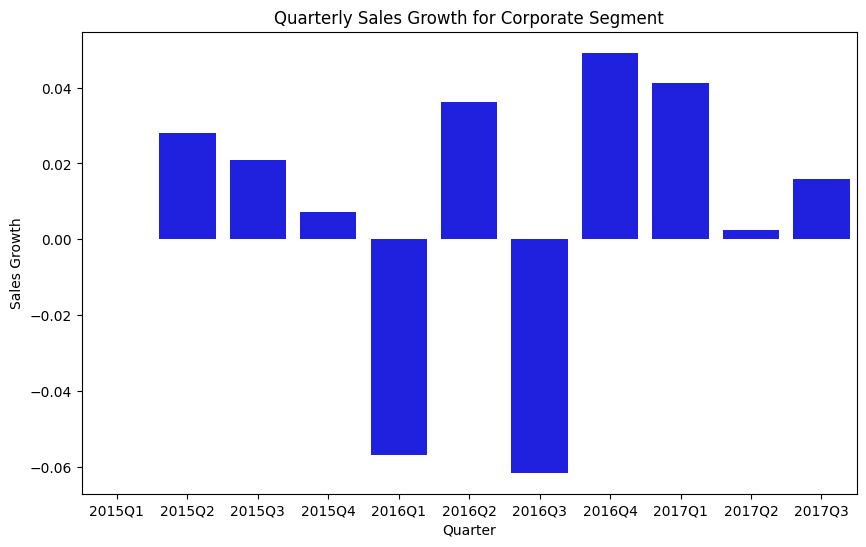

In [49]:

df = df.sort_values(by='OrderDate')


df['Quarter'] = df['OrderDate'].dt.to_period('Q')
quarterly_sales = df.groupby(['Quarter', 'Customer_Segment'])['Sales'].sum().reset_index()


quarterly_sales['Sales_Growth'] = quarterly_sales.groupby('Customer_Segment')['Sales'].pct_change()


customer_segments = ['Home Office', 'Consumer', 'Corporate']

for segment in customer_segments:
    segment_data = quarterly_sales[quarterly_sales['Customer_Segment'] == segment]
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Quarter', y='Sales_Growth', data=segment_data, color='blue')
    plt.title(f'Quarterly Sales Growth for {segment} Segment')
    plt.xlabel('Quarter')
    plt.ylabel('Sales Growth')
    plt.show()

/var/folders/fy/fj7y6ph920j5r199851bfn1r0000gn/T/ipykernel_32338/308054322.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  q2_data = df_consumer[(df_consumer['OrderDate'] >= '2016-04-01') & (df['OrderDate'] < '2016-07-01')]
/var/folders/fy/fj7y6ph920j5r199851bfn1r0000gn/T/ipykernel_32338/308054322.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  q2_2017_data = df_consumer[(df_consumer['OrderDate'] >= '2017-04-01') & (df['OrderDate'] < '2017-07-01')]
/var/folders/fy/fj7y6ph920j5r199851bfn1r0000gn/T/ipykernel_32338/308054322.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  q3_data = df_consumer[(df_consumer['OrderDate'] >= '2016-07-01') & (df['OrderDate'] < '2016-10-01')]


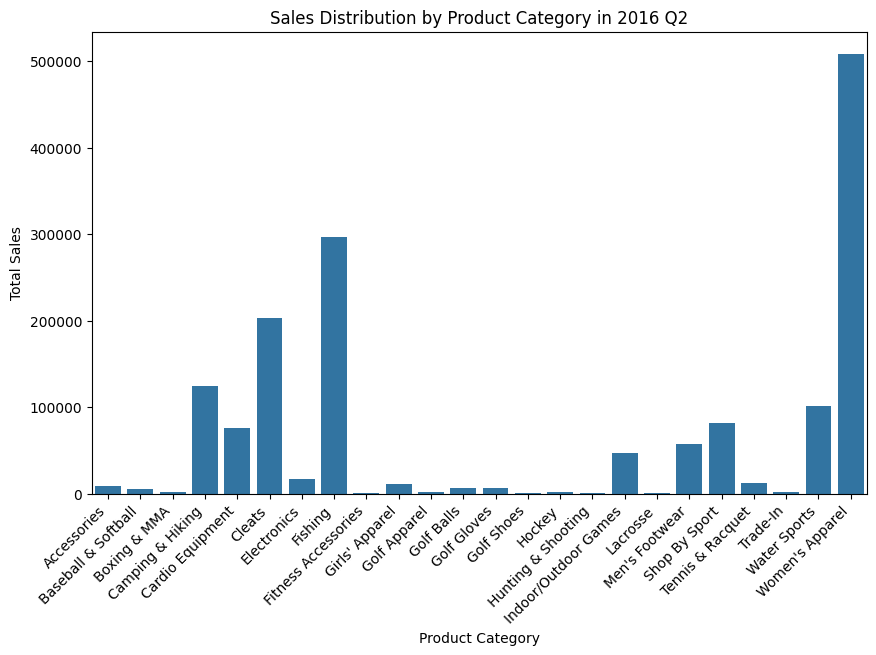

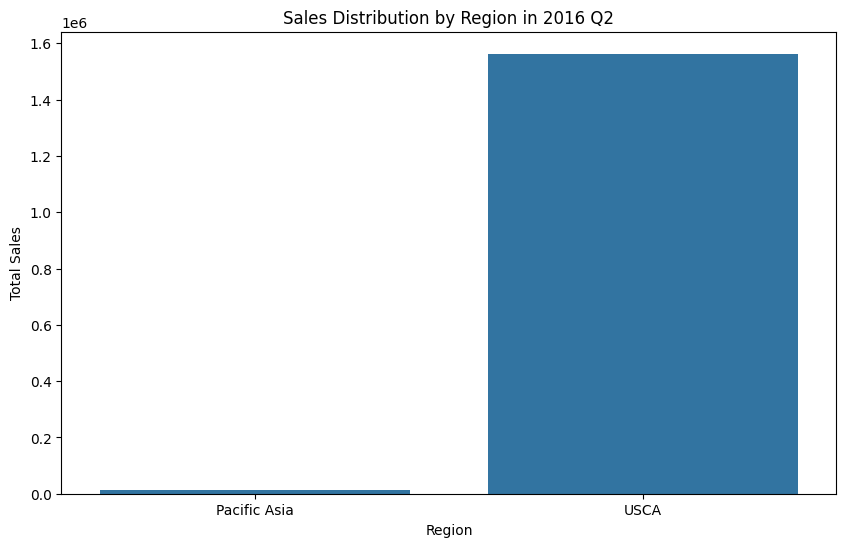

In [138]:
q2_data = df_consumer[(df_consumer['OrderDate'] >= '2016-04-01') & (df['OrderDate'] < '2016-07-01')]
q2_2017_data = df_consumer[(df_consumer['OrderDate'] >= '2017-04-01') & (df['OrderDate'] < '2017-07-01')]
q3_data = df_consumer[(df_consumer['OrderDate'] >= '2016-07-01') & (df['OrderDate'] < '2016-10-01')]

sales_by_product = q2_data.groupby('Category_Name')['Sales'].sum().reset_index()
sales_by_region = q2_data.groupby('Market')['Sales'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Category_Name', y='Sales', data=sales_by_product)
plt.title('Sales Distribution by Product Category in 2016 Q2')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right') 
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Market', y='Sales', data=sales_by_region)
plt.title('Sales Distribution by Region in 2016 Q2')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

/var/folders/fy/fj7y6ph920j5r199851bfn1r0000gn/T/ipykernel_32338/3006014097.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_data['Quarter'] = segment_data['Quarter'].astype(str)
/var/folders/fy/fj7y6ph920j5r199851bfn1r0000gn/T/ipykernel_32338/3006014097.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_data['Quarter'] = segment_data['Quarter'].astype(str)
/var/folders/fy/fj7y6ph920j5r199851bfn1r0000gn/T/ipykernel_32338/3006014097.py:25: SettingWithCopyWarning: 
A value is trying to b

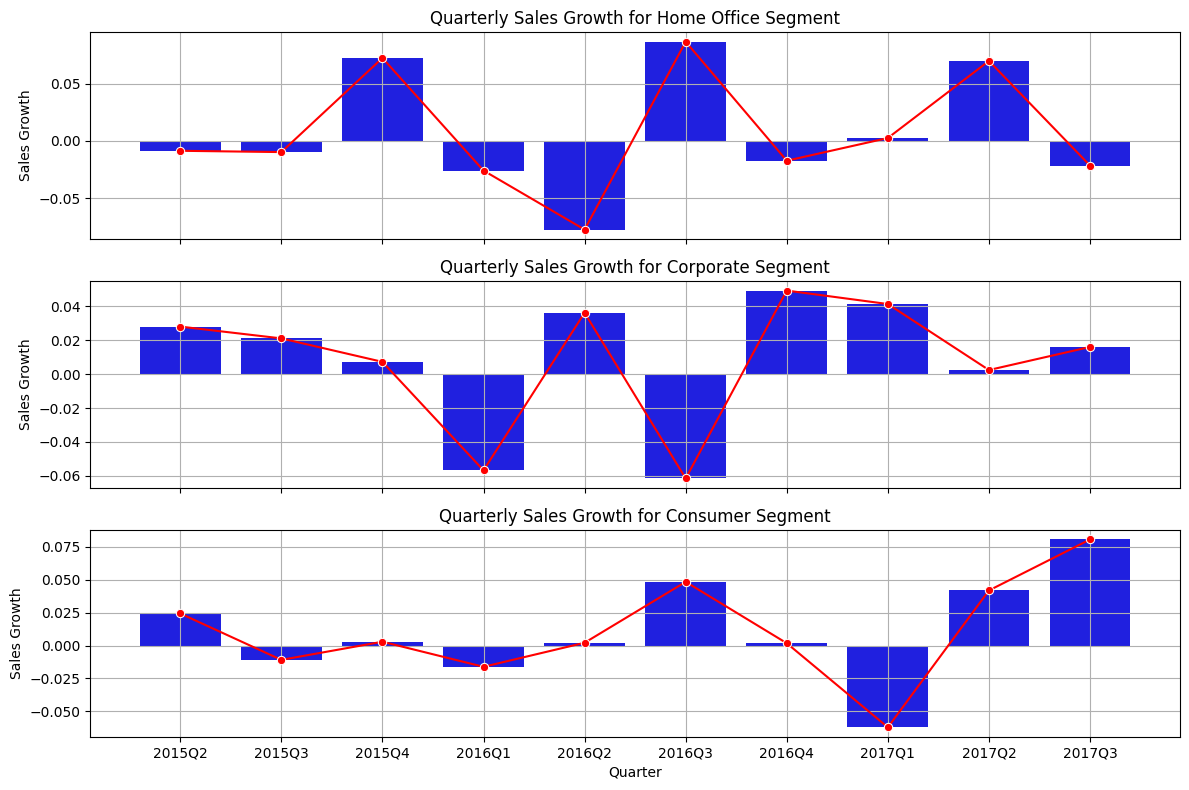

In [120]:

df = df.sort_values(by='OrderDate')

df['Quarter'] = df['OrderDate'].dt.to_period('Q')

quarterly_sales = df.groupby(['Quarter', 'Customer_Segment'])['Sales'].sum().reset_index()

quarterly_sales['Sales_Growth'] = quarterly_sales.groupby('Customer_Segment')['Sales'].pct_change()

customer_segments = ['Home Office', 'Corporate', 'Consumer']

fig, axes = plt.subplots(nrows=len(customer_segments), ncols=1, figsize=(12, 8), sharex=True)

for i, segment in enumerate(customer_segments):
    segment_data = quarterly_sales[quarterly_sales['Customer_Segment'] == segment]
    segment_data['Quarter'] = segment_data['Quarter'].astype(str)
    
    sns.barplot(x='Quarter', y='Sales_Growth', data=segment_data, color='blue', ax=axes[i])
   
    sns.lineplot(x='Quarter', y='Sales_Growth', data=segment_data, color='red', marker='o', ax=axes[i])
   
    axes[i].set_title(f'Quarterly Sales Growth for {segment} Segment')
    axes[i].set_ylabel('Sales Growth')
    axes[i].grid(True)

plt.xlabel('Quarter')
plt.tight_layout()
plt.show()

/var/folders/fy/fj7y6ph920j5r199851bfn1r0000gn/T/ipykernel_32338/1103084225.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  q2_data3 = df_home_office[(df_home_office['OrderDate'] >= '2016-07-01') & (df['OrderDate'] < '2016-10-01')]
/var/folders/fy/fj7y6ph920j5r199851bfn1r0000gn/T/ipykernel_32338/1103084225.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  q2_data2 = df_corporate[(df_corporate['OrderDate'] >= '2016-07-01') & (df['OrderDate'] < '2016-10-01')]


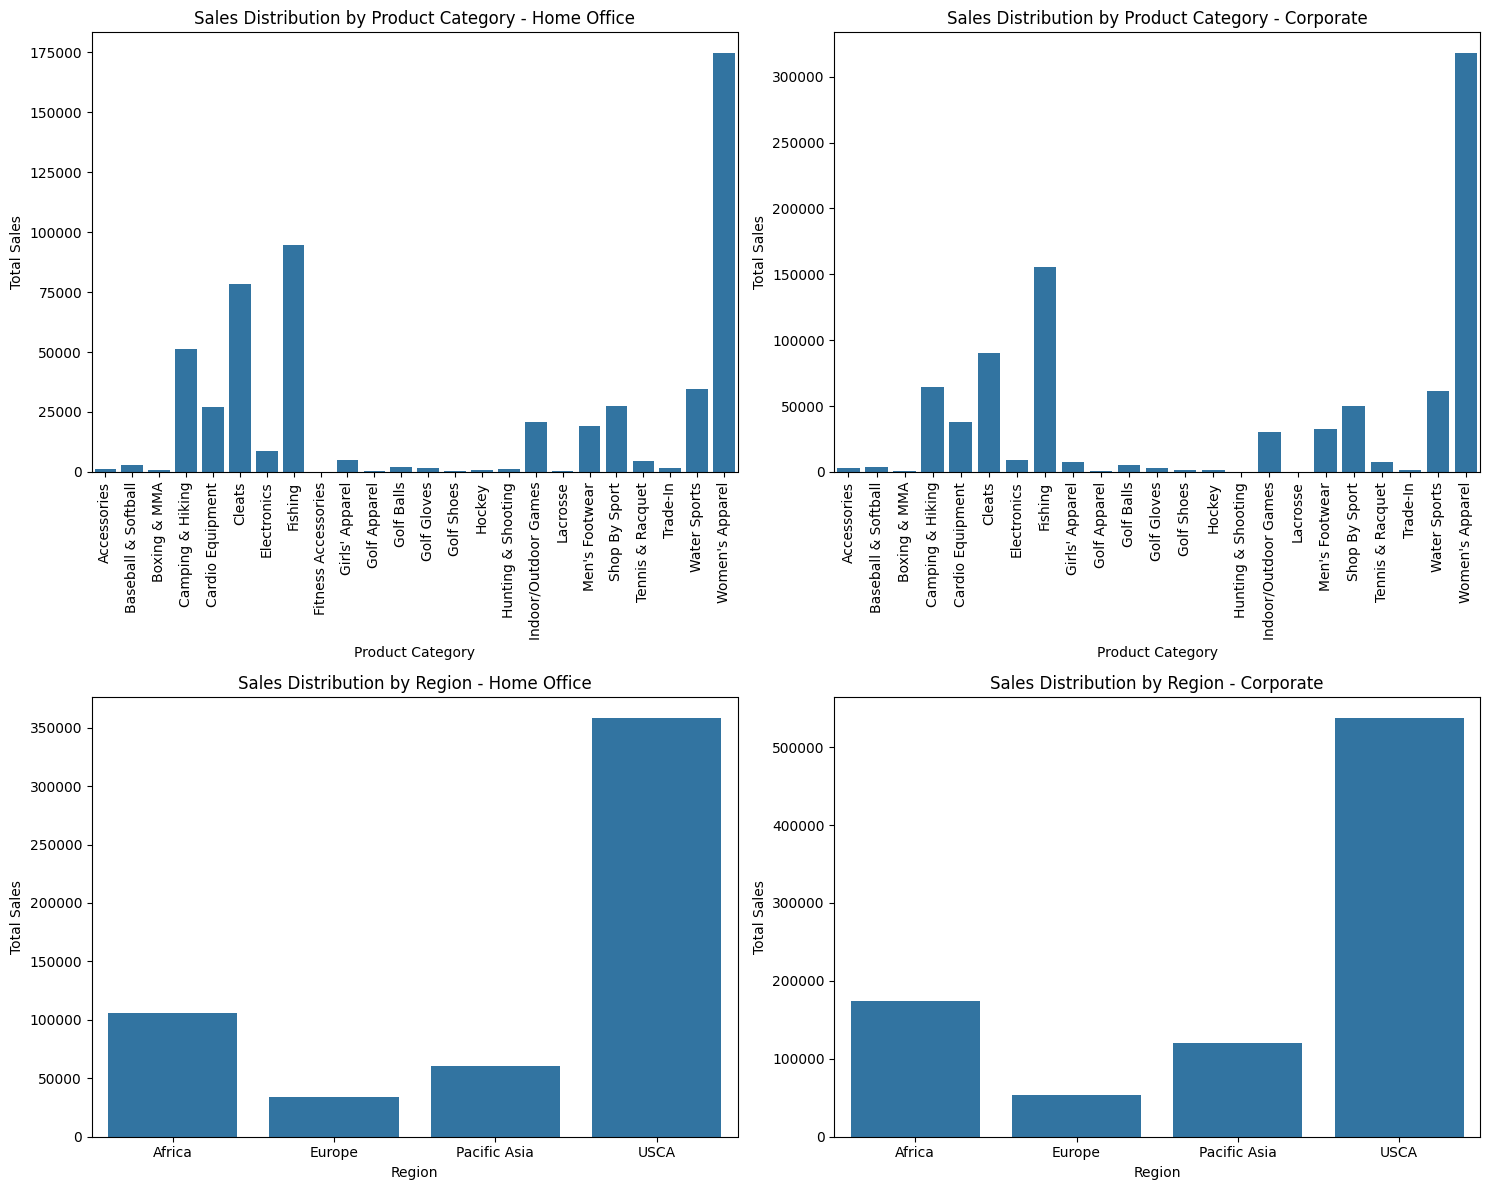

In [145]:
q2_data3 = df_home_office[(df_home_office['OrderDate'] >= '2016-07-01') & (df['OrderDate'] < '2016-10-01')]
q2_data2 = df_corporate[(df_corporate['OrderDate'] >= '2016-07-01') & (df['OrderDate'] < '2016-10-01')]
sales_by_product_segment1 = q2_data3.groupby('Category_Name')['Sales'].sum().reset_index()
sales_by_product_segment2 = q2_data2.groupby('Category_Name')['Sales'].sum().reset_index()

sales_by_region_segment1 = q2_data3.groupby('Market')['Sales'].sum().reset_index()
sales_by_region_segment2 = q2_data2.groupby('Market')['Sales'].sum().reset_index()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

sns.barplot(x='Category_Name', y='Sales', data=sales_by_product_segment1, ax=axes[0, 0])
axes[0, 0].set_title('Sales Distribution by Product Category - Home Office')
axes[0, 0].set_xlabel('Product Category')
axes[0, 0].set_ylabel('Total Sales')
axes[0, 0].tick_params(axis='x', rotation=90)

sns.barplot(x='Category_Name', y='Sales', data=sales_by_product_segment2, ax=axes[0, 1])
axes[0, 1].set_title('Sales Distribution by Product Category - Corporate')
axes[0, 1].set_xlabel('Product Category')
axes[0, 1].set_ylabel('Total Sales')
axes[0, 1].tick_params(axis='x', rotation=90)

sns.barplot(x='Market', y='Sales', data=sales_by_region_segment1, ax=axes[1, 0])
axes[1, 0].set_title('Sales Distribution by Region - Home Office')
axes[1, 0].set_xlabel('Region')
axes[1, 0].set_ylabel('Total Sales')

sns.barplot(x='Market', y='Sales', data=sales_by_region_segment2, ax=axes[1, 1])
axes[1, 1].set_title('Sales Distribution by Region - Corporate')
axes[1, 1].set_xlabel('Region')
axes[1, 1].set_ylabel('Total Sales')

plt.tight_layout()

plt.show()